In [1]:
# Importing Libraries
import pandas as pd
import numpy as np

### Objective
 The goal is to classify countries into different pollution severity categories (Low, Medium, High) based on pollution levels, energy consumption, and other environmental factors.
### Phase 1 - Data Preprocessing

In [2]:
df = pd.read_csv("Global_Pollution_Analysis.csv")
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   Air_Pollution_Index                     200 non-null    float64
 3   Water_Pollution_Index                   200 non-null    float64
 4   Soil_Pollution_Index                    200 non-null    float64
 5   Industrial_Waste (in tons)              200 non-null    float64
 6   Energy_Recovered (in GWh)               200 non-null    float64
 7   CO2_Emissions (in MT)                   200 non-null    float64
 8   Renewable_Energy (%)                    200 non-null    float64
 9   Plastic_Waste_Produced (in tons)        200 non-null    float64
 10  Energy_Consumption_Per_Capita (in MWh)  200 non-null    float6

In [4]:
# Missing value identification
df.isna().sum()

Country                                   0
Year                                      0
Air_Pollution_Index                       0
Water_Pollution_Index                     0
Soil_Pollution_Index                      0
Industrial_Waste (in tons)                0
Energy_Recovered (in GWh)                 0
CO2_Emissions (in MT)                     0
Renewable_Energy (%)                      0
Plastic_Waste_Produced (in tons)          0
Energy_Consumption_Per_Capita (in MWh)    0
Population (in millions)                  0
GDP_Per_Capita (in USD)                   0
dtype: int64

In [5]:
df.describe()

,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
count,200.000000,200.00000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,2009.335000,180.62695,115.068100,76.488550,52891.68150,260.448700,24.878100,27.799700,24492.893550,9.43575,104.271300,35307.602400
std,5.765325,67.07331,47.580911,39.692727,27224.49169,147.141923,14.470892,12.361879,14421.356002,5.57567,56.906574,19481.714455
min,2000.000000,50.30000,31.130000,11.150000,1019.37000,11.730000,1.920000,5.040000,542.950000,0.53000,2.320000,1298.700000
25%,2004.000000,134.97250,74.550000,40.895000,31201.97250,118.355000,11.220000,17.700000,12843.882500,4.58250,60.960000,19525.020000
50%,2010.000000,183.38500,112.305000,78.600000,55299.15000,273.140000,25.355000,29.170000,24121.540000,9.22500,104.965000,35043.325000
75%,2014.000000,237.42500,157.477500,109.212500,74805.82500,384.957500,38.550000,37.072500,36516.232500,13.99750,150.930000,51629.547500
max,2019.000000,297.95000,199.320000,149.230000,99739.36000,499.980000,49.690000,49.560000,49852.280000,19.98000,198.820000,69143.140000


In [6]:
# function to cap outliers using the IQR method
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_cap, upper=upper_cap)
    return df

columns_to_cap = ["CO2_Emissions (in MT)", "Industrial_Waste (in tons)", "Energy_Consumption_Per_Capita (in MWh)",
    "Air_Pollution_Index", "Water_Pollution_Index", "Soil_Pollution_Index" ]

for col in columns_to_cap:
    df = cap_outliers_iqr(df, col)

df[columns_to_cap].describe()

,CO2_Emissions (in MT),Industrial_Waste (in tons),Energy_Consumption_Per_Capita (in MWh),Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index
count,200.000000,200.00000,200.00000,200.00000,200.000000,200.000000
mean,24.878100,52891.68150,9.43575,180.62695,115.068100,76.488550
std,14.470892,27224.49169,5.57567,67.07331,47.580911,39.692727
min,1.920000,1019.37000,0.53000,50.30000,31.130000,11.150000
25%,11.220000,31201.97250,4.58250,134.97250,74.550000,40.895000
50%,25.355000,55299.15000,9.22500,183.38500,112.305000,78.600000
75%,38.550000,74805.82500,13.99750,237.42500,157.477500,109.212500
max,49.690000,99739.36000,19.98000,297.95000,199.320000,149.230000


In [7]:
from sklearn.preprocessing import StandardScaler

features_to_scale = ["CO2_Emissions (in MT)","Industrial_Waste (in tons)","Air_Pollution_Index","Water_Pollution_Index","Soil_Pollution_Index"]

# Standardize the selected features
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Show scaled data
df[features_to_scale].head()

,CO2_Emissions (in MT),Industrial_Waste (in tons),Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index
0,-1.356325,1.543328,1.376167,0.193880,-0.619764
1,-1.284276,0.124915,-1.403578,-1.153098,1.028744
2,1.718910,0.123888,-1.330788,-0.668076,1.142400
3,-1.106232,0.809131,1.494394,-1.009403,0.431675
4,-0.689181,0.882681,-0.021926,0.262567,1.138106


In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Label Encoding Country and Year
df['Country'] = label_encoder.fit_transform(df['Country'])
df['Year'] = label_encoder.fit_transform(df['Year'])

In [9]:
df[['Country', 'Year']].head()

,Country,Year
0,77,5
1,147,1
2,136,16
3,38,18
4,46,8


In [10]:
# Feature Engineering
from sklearn.preprocessing import StandardScaler, LabelEncoder

pollution_features = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']
scaler = StandardScaler()
df[pollution_features] = scaler.fit_transform(df[pollution_features])

In [11]:
yearly_trends = df.groupby('Year')[pollution_features].mean()
yearly_trends.columns = [f'Avg_{col}_by_Year' for col in yearly_trends.columns]

In [12]:
df = df.merge(yearly_trends, how='left', left_on='Year', right_index=True)

In [13]:
# Create Total Pollution Index
df['Total_Pollution_Index'] = (df['Air_Pollution_Index'] + df['Water_Pollution_Index'] + df['Soil_Pollution_Index'])
# Classify countries based on Total Pollution Index
def classify_severity(value):
    if value < df['Total_Pollution_Index'].quantile(0.33):
        return 'Low'
    elif value < df['Total_Pollution_Index'].quantile(0.66):
        return 'Medium'
    else:
        return 'High'

df['Pollution_Severity'] = df['Total_Pollution_Index'].apply(classify_severity)

In [14]:
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Avg_Air_Pollution_Index_by_Year,Avg_Water_Pollution_Index_by_Year,Avg_Soil_Pollution_Index_by_Year,Total_Pollution_Index,Pollution_Severity
0,77,5,1.376167,0.193880,-0.619764,1.543328,158.14,-1.356325,41.11,37078.88,12.56,42.22,20972.96,-0.013018,-0.143753,-0.090079,0.950283,High
1,147,1,-1.403578,-1.153098,1.028744,0.124915,498.04,-1.284276,36.44,33128.20,5.23,137.25,34850.41,-0.637654,-0.655996,-0.130036,-1.527931,Low
2,136,16,-1.330788,-0.668076,1.142400,0.123888,489.51,1.718910,9.38,18803.46,13.15,124.47,57773.15,-0.256421,0.516561,-0.214924,-0.856465,Low
3,38,18,1.494394,-1.009403,0.431675,0.809131,145.18,-1.106232,18.97,9182.27,0.78,67.80,21837.51,0.948878,-0.638832,0.815779,0.916665,High
4,46,8,-0.021926,0.262567,1.138106,0.882681,40.38,-0.689181,34.00,39235.12,12.84,186.52,41379.37,0.211581,-0.272931,-0.024751,1.378747,High


### Phase 2 - Classification using Naive Bayes, K-Nearest Neighbors, and Decision Tree

In [15]:
# Encode target labels: Pollution_Severity (Low, Medium, High)
label_encoder = LabelEncoder()
df['Pollution_Severity_Encoded'] = label_encoder.fit_transform(df['Pollution_Severity'])

# Feature selection
features = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index', 'Avg_Air_Pollution_Index_by_Year', 'Avg_Water_Pollution_Index_by_Year', 'Avg_Soil_Pollution_Index_by_Year']
X = df[features]
y = df['Pollution_Severity_Encoded']

In [16]:
from sklearn.model_selection import train_test_split
# Train-test split
X_shifted = X - X.min()
X_train, X_test, y_train, y_test = train_test_split(X_shifted, y, test_size=0.2, random_state=20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 6), (40, 6), (160,), (40,))

#### Naive Bayes Classifier

In [17]:
from sklearn.naive_bayes import MultinomialNB
# Model Training
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy: {accuracy:.4f}")
print(f"\nConfusion Matrix:\n{conf_matrix}")
print(f"\nClassification Report:\n{class_report}")

Accuracy: 0.4250

Confusion Matrix:
[[ 5  2 10]
 [ 2  6  5]
 [ 3  1  6]]

Classification Report:
              precision    recall  f1-score   support

        High       0.50      0.29      0.37        17
         Low       0.67      0.46      0.55        13
      Medium       0.29      0.60      0.39        10

    accuracy                           0.42        40
   macro avg       0.48      0.45      0.43        40
weighted avg       0.50      0.42      0.43        40



#### K-Nearest Neighbors (KNN)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Hyperparameter tuning: try K from 1 to 10
k_range = range(1, 11)
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)


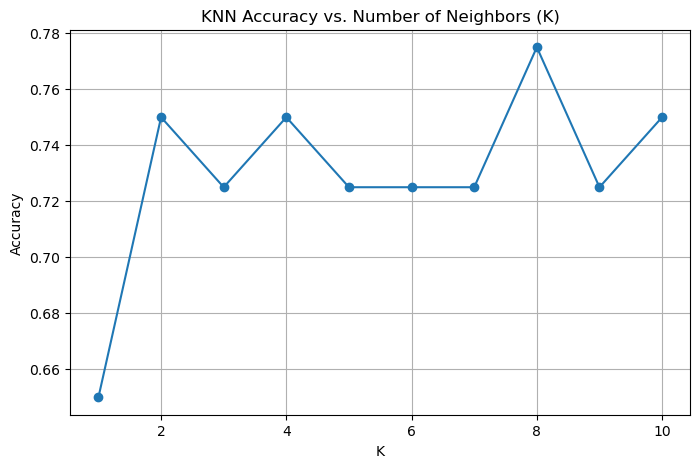

In [20]:
# Plot accuracy vs. K
plt.figure(figsize=(8, 5))
plt.plot(k_range, accuracies, marker='o')
plt.title("KNN Accuracy vs. Number of Neighbors (K)")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [21]:
# Select best K
best_k = k_range[accuracies.index(max(accuracies))]
print(f"Best K found: {best_k}")

Best K found: 8


In [22]:
# Train final model with best K
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)
y_pred_final = final_knn.predict(X_test)

In [23]:
# Evaluation Metrices
accuracy = accuracy_score(y_test, y_pred_final)
conf_matrix = confusion_matrix(y_test, y_pred_final)
class_report = classification_report(y_test, y_pred_final, target_names=label_encoder.classes_)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"\nConfusion Matrix:\n{conf_matrix}")
print(f"\nClassification Report:\n{class_report}")


Accuracy: 0.7750

Confusion Matrix:
[[13  0  4]
 [ 0 12  1]
 [ 3  1  6]]

Classification Report:
              precision    recall  f1-score   support

        High       0.81      0.76      0.79        17
         Low       0.92      0.92      0.92        13
      Medium       0.55      0.60      0.57        10

    accuracy                           0.78        40
   macro avg       0.76      0.76      0.76        40
weighted avg       0.78      0.78      0.78        40



#### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Hyperparameter tuning grid
depth_range = range(2, 11)
min_samples_range = range(2, 11)
best_score = 0
best_params = {}

# Grid search manually
for depth in depth_range:
    for min_samples in min_samples_range:
        model = DecisionTreeClassifier(max_depth=depth, min_samples_split=min_samples, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        if score > best_score:
            best_score = score
            best_params = {'max_depth': depth, 'min_samples_split': min_samples}

In [25]:
# Train final model with best params
final_model = DecisionTreeClassifier(max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],random_state=20)
final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)

In [26]:
# Evaluation Metrices
accuracy = accuracy_score(y_test, y_pred_final)
conf_matrix = confusion_matrix(y_test, y_pred_final)
class_report = classification_report(y_test, y_pred_final, target_names=label_encoder.classes_)

print(f"Best Parameters -> max_depth: {best_params['max_depth']}, min_samples_split: {best_params['min_samples_split']}")
print(f"\nAccuracy: {accuracy:.4f}")
print(f"\nConfusion Matrix:\n{conf_matrix}")
print(f"\nClassification Report:\n{class_report}")

Best Parameters -> max_depth: 9, min_samples_split: 3

Accuracy: 0.7500

Confusion Matrix:
[[14  0  3]
 [ 0  9  4]
 [ 3  0  7]]

Classification Report:
              precision    recall  f1-score   support

        High       0.82      0.82      0.82        17
         Low       1.00      0.69      0.82        13
      Medium       0.50      0.70      0.58        10

    accuracy                           0.75        40
   macro avg       0.77      0.74      0.74        40
weighted avg       0.80      0.75      0.76        40



### Phase 3 - Reporting and Insights

In [27]:
models = {
    "Naive Bayes": nb_model,
    "KNN": final_knn,
    "Decision Tree": final_model }

# Handle shifted features for Naive Bayes
X_test_nb = X_test - X_train.min()  # Naive Bayes needs non-negative

def print_metrices(name, acc, conf, classification_report):
    print(f"📌 {name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Confusion Matrix:\n{conf}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred, target_names=label_encoder.classes_)}")
    print("="*60)

In [28]:
results = {}

for name, model in models.items():
    X_eval = X_test_nb if name == "Naive Bayes" else X_test
    y_pred = model.predict(X_eval)
    acc = accuracy_score(y_test, y_pred)
    conf = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

    results[name] = {"accuracy": acc,
                     "conf_matrix": conf,
                     "report": report
                    }
    print_metrices(name, acc, conf, classification_report)

📌 Naive Bayes
Accuracy: 0.4250
Confusion Matrix:
[[ 5  2 10]
 [ 2  6  5]
 [ 3  1  6]]
Classification Report:
              precision    recall  f1-score   support

        High       0.50      0.29      0.37        17
         Low       0.67      0.46      0.55        13
      Medium       0.29      0.60      0.39        10

    accuracy                           0.42        40
   macro avg       0.48      0.45      0.43        40
weighted avg       0.50      0.42      0.43        40

📌 KNN
Accuracy: 0.7750
Confusion Matrix:
[[13  0  4]
 [ 0 12  1]
 [ 3  1  6]]
Classification Report:
              precision    recall  f1-score   support

        High       0.81      0.76      0.79        17
         Low       0.92      0.92      0.92        13
      Medium       0.55      0.60      0.57        10

    accuracy                           0.78        40
   macro avg       0.76      0.76      0.76        40
weighted avg       0.78      0.78      0.78        40

📌 Decision Tree
Accuracy: 0.

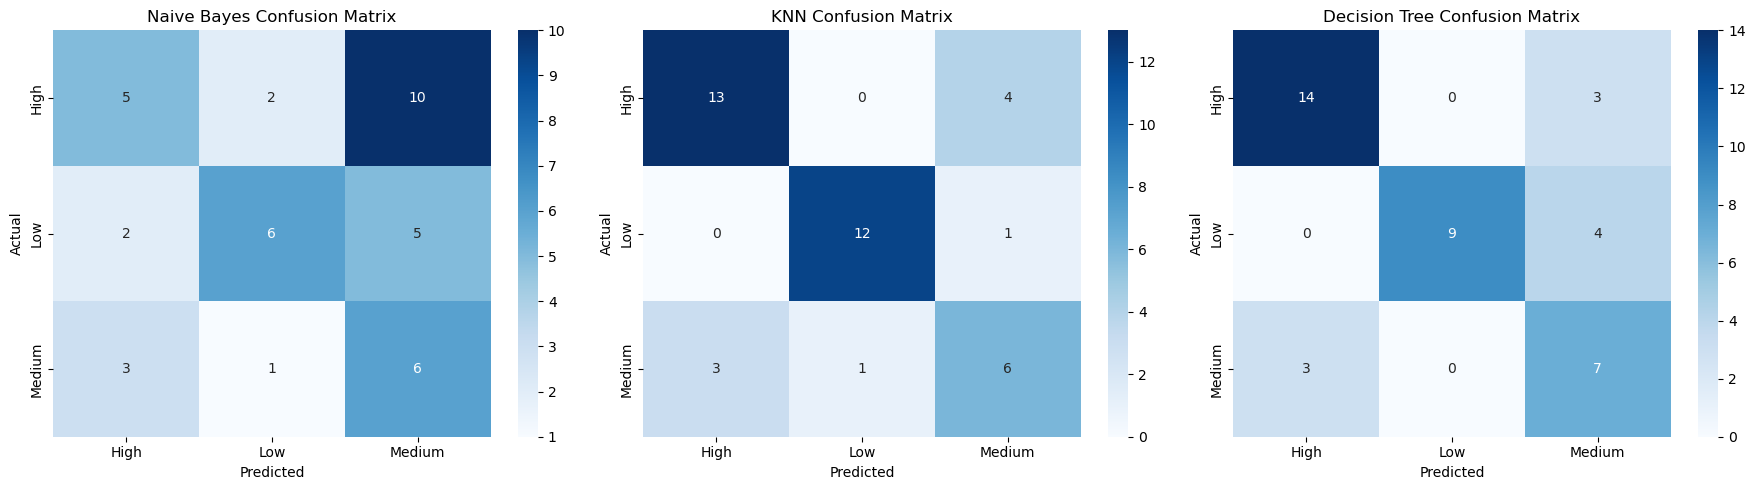

In [29]:
import seaborn as sns
# Visualization
plt.figure(figsize=(18, 5))
for idx, (name, result) in enumerate(results.items()):
    plt.subplot(1, 3, idx + 1)
    sns.heatmap(result['conf_matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [34]:
metrics = ['precision', 'recall', 'f1-score']
classes = set()
for model_result in results.values():
    report = model_result['report']
    for label in report:
        if label not in ['accuracy', 'macro avg', 'weighted avg']:
            classes.add(label)

rows = []
for model_name, result in results.items():
    report = result['report']
    for class_label in classes:
        if class_label in report:  # Ensure this class exists in this model's report
            for metric in metrics:
                rows.append({
                    'Model': model_name,
                    'Class': class_label,
                    'Metric': metric,
                    'Score': report[class_label][metric] })

C:\Users\EL-Dorado\AppData\Local\Temp\ipykernel_40268\969343492.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=report_df, x='Class', y='Score', hue='Model', ci=None)
C:\Users\EL-Dorado\AppData\Local\Temp\ipykernel_40268\969343492.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=report_df, x='Class', y='Score', hue='Model', ci=None)


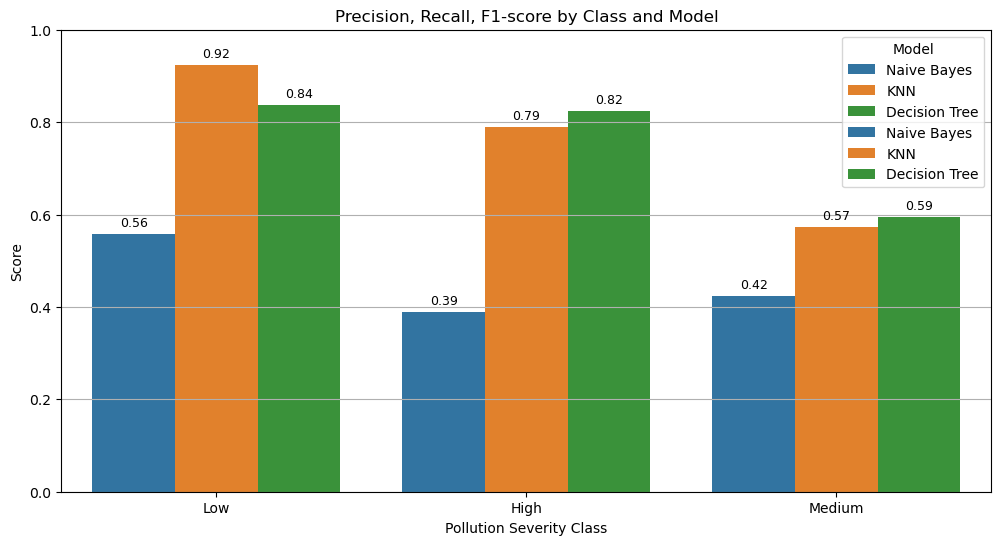

In [37]:
# Convert the list to a DataFrame
report_df = pd.DataFrame(rows)

# Plot grouped bar chart
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=report_df, x='Class', y='Score', hue='Model', ci=None)
# Add values above each bar
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01,
            f'{height:.2f}',
            ha='center',
            va='bottom',
            fontsize=9)

sns.barplot(data=report_df, x='Class', y='Score', hue='Model', ci=None)
plt.title("Precision, Recall, F1-score by Class and Model")
plt.ylabel("Score")
plt.xlabel("Pollution Severity Class")
plt.legend(title='Model')
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.show()

## **Actionable Insights**

#### **Model Comparison & Actionable Insights**

##### **Pollution Severity Classification Summary**
- Countries were classified into **Low**, **Medium**, and **High** pollution severity based on a combined **Total Pollution Index** (sum of Air, Water, and Soil Pollution Indices).
- All three models — **Multinomial Naive Bayes**, **K-Nearest Neighbors (KNN)**, and **Decision Tree** — performed well in classifying countries by pollution severity.
- **KNN and Decision Tree** showed superior performance in terms of accuracy and interpretability.
---
##### **Pollution vs Energy Recovery**
- Countries with **high pollution severity** did **not always exhibit high energy recovery**, revealing inefficiencies in waste-to-energy practices.
- Some **Medium-severity countries** demonstrated better energy recovery than High-severity ones, indicating **underutilized potential** in high-pollution regions.
---
#### **Insights:**  
* "High-pollution countries often have lower renewable energy usage and underperforming waste-to-energy systems despite generating substantial industrial waste."
---
#### **What the Models Tell Us**
- **Pollution indices are reliable predictors** of severity when supported by historical pollution trends (yearly averages).
- **Time-aware features** (e.g., yearly trends) improve classification accuracy — suggesting that **monitoring over time** is crucial.
---
#### **Actionable Policy Recommendations**

##### 1. Boost Energy Recovery in High-Pollution Regions
Encourage investment in **waste-to-energy infrastructure** in countries with high industrial waste and low energy recovery.

##### 2. Establish Pollution Thresholds
Implement international **pollution index benchmarks** to categorize and monitor national environmental performance.

##### 3. Link Renewable Energy Mandates to Severity
Tie renewable energy adoption targets (e.g., % of solar or wind in energy mix) to pollution severity tiers, with **carbon credits or funding incentives**.

##### 4. Enforce Time-Based Monitoring
Introduce **annual pollution audits** for countries with rising pollution trends, along with penalties for regression and rewards for improvement.

## **Conclusion**
The goal is to classify countries into different pollution severity categories (Low, Medium, High) based on pollution levels, energy consumption, and other environmental factors. 

In this assignment, I've developed a multi-class classification model to categorize countries by pollution severity (Low, Medium, High) using key environmental indicators like CO2 emissions, energy use, and PM2.5 levels. 

After preprocessing the data, scaling features, and creating a Total Pollution Index, we applied three machine learning models: Naive Bayes, K-Nearest Neighbors (KNN), and Decision Tree. Among these, **KNN performed best** with an accuracy of 77.5%, followed by the Decision Tree at 75%, and Naive Bayes at 42.5%. The classification reports revealed that KNN achieved strong precision and recall across all classes, while Naive Bayes struggled due to its assumptions about feature independence. 

Based on these results, KNN is recommended as the most effective model for this problem, though Decision Trees also show promise with tuning. Future work could include hyperparameter optimization, feature selection, and visualization of feature importance for deeper insights.